In [2]:
#import relevant packages
from bs4 import BeautifulSoup
import requests
import re
import lxml
import pandas as pd

In [3]:
#load the website using Beautifulsoup
results = requests.get('https://meqasa.com/houses-for-rent-in-ghana')
soup = BeautifulSoup(results.text, 'lxml')
base_url = 'https://meqasa.com'

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head itemscope="" itemtype="http://schema.org/WebSite">
  <script>
   (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','//www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-55496368-1', 'auto', {'allowLinker': true});
  ga('require', 'linker');
  ga('linker:autoLink', ['blog.meqasa.com','orinocoriverlimited.meqasa.com','prabongreenfields.meqasa.com','mayfairestates.meqasa.com','emefsestates.meqasa.com','cjdevelopment.meqasa.com','realhomesghanalimited.meqasa.com','afariwaaestates.meqasa.com','3dhomes.meqasa.com','whitewallpropertieslimited.meqasa.com','adomcityestate.meqa
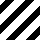

In [4]:
#make it more readable
print(soup.prettify())

In [5]:
#find all div tags with a specific class
meqasa_houses = soup.findAll('div', {'class': {'row mqs-featured-prop-inner-wrap clickable'}})

In [8]:
#create a list of properties
properties = []

#loop through the website to find details
for details in meqasa_houses:
    property_name = details.h2.a.text
    currency = details.p.text.split('/')[0].strip().replace('Price', '').replace('GH₵', 'GH₵ ').split(' ')[0]
    price =details.p.text.split('/')[0].strip().replace('Price', '').replace('GH₵', 'GH₵ ')
    only_price = re.sub(r"[^0-9]", '', price)
    only_currency = re.sub(r"[0-9]", '', price).replace(" ,", "")
    bed =details.find('li', {'class': {'bed'}}).span.text
    bath =details.find('li', {'class': {'shower'}}).span.text
    house_url =base_url + details.find('a').attrs['href']
    posted =details.find('p', {'class': {'wsnr'}}).text
    period =details.p.text.split(' / ')[1].split('\n')[0]
    
    #these codes inspect a div for details, if there's an error it returns a zero
    try:
        garage = details.find('li', {'class': {'garage'}}).span.text
    except:
        garage = "0"
    
    try:
        area = details.find('li', {'class': {'area'}}).span.text.replace(" ", "")
    except:
        area = "0"
        
    #getting individual property descriptions
    property_ = requests.get(house_url)
    soup1 = BeautifulSoup(property_.content, 'lxml')
    description = soup1.find('div', {'class' :{'description'}}).p.text
    time_posted = soup1.find('section', {'class': {'widget'}}).p.span.next.next
    for td in soup1.findAll('tr'):
      if td.findAll("td")[0].text == "Address":
        address = td.findAll("td")[1].text
    
    properties.append({
        'property': property_name,
        'beds': bed,
        'showers' : bath,
        'garages': garage,
        'area': area,
        'description': description,
        'price': only_price,
        'currency': only_currency,
        'rent_period': period,
        'url': house_url,
        'address': address,
        'time_posted': time_posted
    })

In [9]:
#export to dataframe
meqasa_properties = pd.DataFrame(properties)

In [ ]:
meqasa_properties.tail()